In [53]:
import numpy as np
import cvxpy as cp

# Given data
A = np.array([[1, 1], [0, 0.95]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
xdes = np.array([10, 0])
N = 20

# Define decision variables
u = cp.Variable(N)
x = cp.Variable((N+1, 2))  # State variables x(t) for t = 0, ..., N-1

# Define the cost function
F = cp.sum(cp.abs(u) + (2 * cp.abs(u) - 1))

# Define the constraints
dynamics_constraints = [x[0] == x0]
for t in range(1,N-1):
    dynamics_constraints.append(x[t+1] == A @ x[t] + b * u[t])
    
dynamics_constraints.append(x[N] == xdes)

# Add actuator constraints
actuator_constraints = [cp.abs(u) <= 1]

# Create the LP problem
problem = cp.Problem(cp.Minimize(F), dynamics_constraints + actuator_constraints)

# Solve the problem
problem.solve(solver=cp.ECOS)

u_opt = u.value
print("Optimal Control Input:")
print(u_opt)


Optimal Control Input:
[-4.10262765e-19 -4.10268490e-19  2.89655931e-24  2.84422549e-24
  2.79038534e-24  2.73984895e-24  2.69652941e-24  2.66345307e-24
  2.64276750e-24  2.79523281e-24  2.64279666e-24  2.66345189e-24
  2.69637870e-24  2.73936934e-24  2.78933664e-24  2.84230583e-24
  2.89340401e-24  2.93684732e-24  2.96592571e-24 -4.10262765e-19]


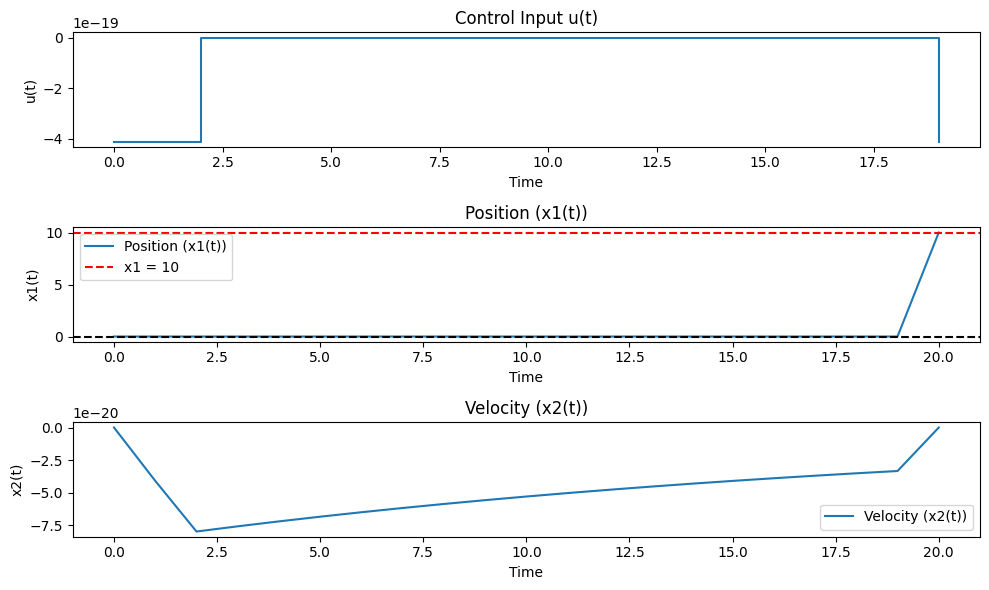

In [56]:
import matplotlib.pyplot as plt

x_opt = np.zeros((N+1, 2))
x_opt[0] = x0
for t in range(1, N):
    x_opt[t] = A @ x_opt[t - 1] + b * u_opt[t - 1]
x_opt[N] = xdes  # Set the state at time N to the desired state

# Plot the input signal u(t)
t = np.arange(N)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.step(t, u_opt, where='post')
plt.title('Control Input u(t)')
plt.xlabel('Time')
plt.ylabel('u(t)')

# Plot position x1(t)
t = np.arange(N+1)
plt.subplot(3, 1, 2)
plt.plot(t, x_opt[:, 0], label='Position (x1(t))')
plt.axhline(y=10, color='r', linestyle='--', label='x1 = 10')
plt.axhline(color='k', linestyle='--')
plt.title('Position (x1(t))')
plt.xlabel('Time')
plt.ylabel('x1(t)')
plt.legend()

# Plot velocity x2(t)
plt.subplot(3, 1, 3)
plt.plot(t, x_opt[:, 1], label='Velocity (x2(t))')
plt.title('Velocity (x2(t))')
plt.xlabel('Time')
plt.ylabel('x2(t)')
plt.legend()

plt.tight_layout()
plt.show()


In [57]:
import cvxpy as cp
import numpy as np

# Define problem data
A = np.array([[1, 1], [0, 0.95]])
b = np.array([0, 0.1])
x0 = np.array([0, 0])
xdes = np.array([10, 0])
N = 20

# Create cvxpy variables
n = A.shape[0]  # Dimension of the state
u = cp.Variable(N)
t = cp.Variable(N)

# Define the LP objective function
objective = cp.Minimize(cp.sum(t))

# Define system dynamics constraints
x = cp.Variable((n, N + 1))
constraints = [x[:, 0] == x0]
for i in range(N):
    constraints += [x[:, i + 1] == A @ x[:, i] + b * u[i]]

# Final state constraint
constraints += [x[:, N] == xdes]

# Actuator constraints
constraints += [u >= -t, u <= t, u >= -(t + 1) / 2, u <= (t + 1) / 2]

# Create the problem instance
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve(solver=cp.ECOS)

# Extract the optimal control input and t values
optimal_u = u.value
optimal_t = t.value

# Print the solution
print("Optimal Control Input (u):")
print(optimal_u)

print("Optimal t values:")
print(optimal_t)

# Extract and print the value of the objective function (total fuel consumption)
optimal_fuel_consumption = problem.value
print("Total Fuel Consumption:", optimal_fuel_consumption)


Optimal Control Input (u):
[ 3.22798720e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  9.99999997e-01  9.53700835e-09
  3.41760266e-09  2.16449914e-09  1.33944881e-09  5.74288947e-10
 -1.99766040e-10 -1.08208323e-09 -2.32015996e-09 -5.90692775e-09
 -9.99999995e-01 -1.00000000e+00 -1.00000001e+00 -1.22798722e+00]
Optimal t values:
[ 5.45597440e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  9.99999998e-01  9.99999994e-01  6.55695601e-09
  6.10628851e-10 -4.24076050e-10 -9.07743431e-10 -1.16634550e-09
 -1.19680367e-09 -9.42733437e-10 -1.78819184e-10  3.08258424e-09
  9.99999992e-01  9.99999999e-01  1.00000000e+00  1.45597443e+00]
Total Fuel Consumption: 15.911948831460895
